___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Employee Churn Analysis Project***". This is the second project of Capstone Project Series, which you will be able to build your own classification models for a variety of business settings.

Also you will research what is Employee Churn?, How it is different from customer churn, Exploratory data analysis and visualization of employee churn dataset using ***matplotlib*** and ***seaborn***, model building and evaluation using python ***scikit-learn*** and ***Tensorflow-Keras*** packages.

You will be able to implement classification techniques in Python. Using Scikit-Learn allowing you to successfully make predictions with Distance Based, Bagging, Boosting algorithms for this project. On the other hand, for Deep Learning you will use Tensorflow-Keras.

After taking Machine learning deployment course, you will able to deploy your model using *Streamlit*.

Before diving into the project, please take a look at the determines and project structure.

- NOTE: This project assumes that you already know the basics of coding in Python and are familiar with model deployement as well as the theory behind Distance Based, Bagging, Boosting algorithms, and Confusion Matrices. You can try more models and methods beside these to improve your model metrics.



# #Determines
In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, you must use exploratory data analysis and data visualization techniques.

Then, you must perform data pre-processing operations such as ***Scaling*** and ***Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms.

You are asked to perform ***Cluster Analysis*** based on the information you obtain during exploratory data analysis and data visualization processes. The purpose of clustering analysis is to cluster data with similar characteristics.

Once the data is ready to be applied to the model, you must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train your models with your train set, test the success of your model with your test set.

Try to make your predictions by using the ***Classification Algorithms***. You can use the related modules of the ***scikit-learn*** and ***Tensorflow-Keras*** library. You can use scikit-learn ***Classification Metrics*** module for accuracy calculation.

Data drift and model drirft are key consepts about ML and MLOPS, you can monitor and check your data and models with plenty of ways and tools. ***Deepchecks*** is one of them and the leading tool for testing and for validating your machine learning models and data, and it enables doing so with minimal effort. In this project, you will apply ***Data Integrity, Train-Test Validation, and Model Evaluation*** checks.
Deepchecks Introduction : https://youtu.be/7ELdizoi6BU


# #Tasks

#### 1. Exploratory Data Analysis
- EDA is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.
- In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics.

#### 2. Data Visualization
- Explore your data via visualizations to find-out:
 - What can be the reason of the churn?
 - Behavioral analysis of churns and not churns ..... etc.

#### 3. Cluster Analysis
- Apply ***clustering algorithms*** and writedown your conclusions about the clusters you created.

#### 5. Predictive Model Building
- Split Data as Train and Test set
- Built Classification Models(at least four models) and Evaluate Model Performances

#### 6. Model Deployement

- Save and Export the Best Model

## #Importing Modules and Predefined Functions#

In [73]:
# pip install scikeras
# pip install keras-tuner --upgrade
# pip install deepchecks --upgrade
# pip install anywidget --upgrade

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import tensorflow as tf
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC, Recall, Precision

/Users/bassels/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## 1. Exploratory Data Analysis

In [4]:
# Set style
sns.set(style='whitegrid')

### 1.1. load and explore data

In [5]:
# 1. Load Dataset
df = pd.read_csv("HR_Dataset.csv")

In [6]:
# 2. Basic checks
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [9]:
# That will remove any leading or trailing whitespace in the columns' names
df.columns = df.columns.str.strip()

### 1.2. Apply Data Integrity Checks
* link: https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_data_integrity.html

In [10]:
from deepchecks.tabular import Dataset
from deepchecks.tabular.suites import data_integrity

# Prepare Deepchecks Dataset
cat_features = [
    'number_project',
    'time_spend_company',
    'Work_accident',
    'promotion_last_5years',
    'Departments',
    'salary'
]

# Make sure your label column is named correctly
ds = Dataset(df, label='left', cat_features=cat_features)

# Run the data integrity suite
integrity_suite = data_integrity()
result = integrity_suite.run(ds)

# Display the results in a notebook
result.show()

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_9G4AR69871N0Z1B48NI1EU1WU">Data Integrity Sui…

In [11]:
# 3. Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64


In [12]:
# 4. Check for duplicates
duplicate_rows = df.duplicated().sum()
print(f"\n🧾 Number of duplicate rows: {duplicate_rows}")


🧾 Number of duplicate rows: 3008


In [13]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [14]:
print(f"Data shape after removing duplicates: {df.shape}")

Data shape after removing duplicates: (11991, 10)


## 2. Data Visualization

In [15]:
# Column overview
print("\nColumns and Types:")
print(df.dtypes)


Columns and Types:
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Departments               object
salary                    object
dtype: object


In [16]:
# 5. Plot distributions for numeric features
numeric_cols = ['satisfaction_level', 'last_evaluation', 'number_project',
                'average_montly_hours', 'time_spend_company']

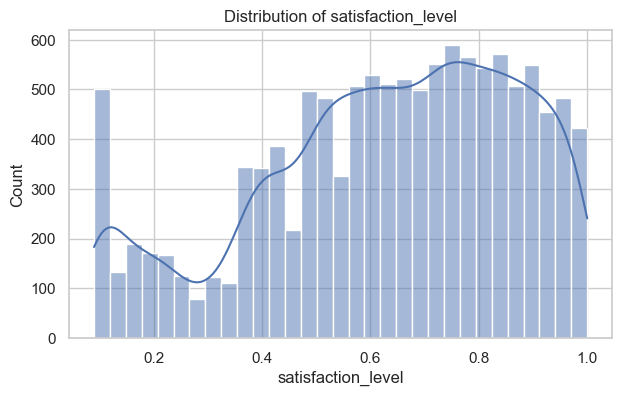

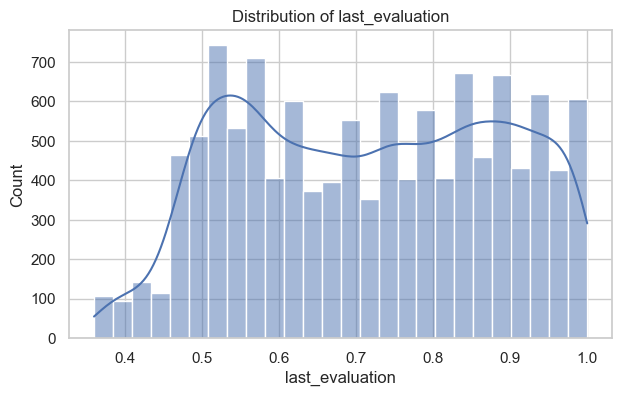

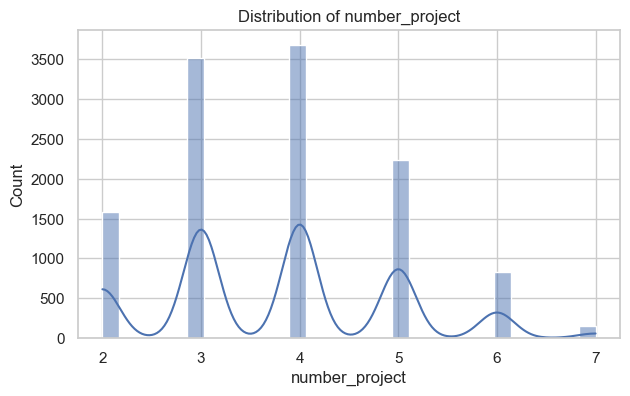

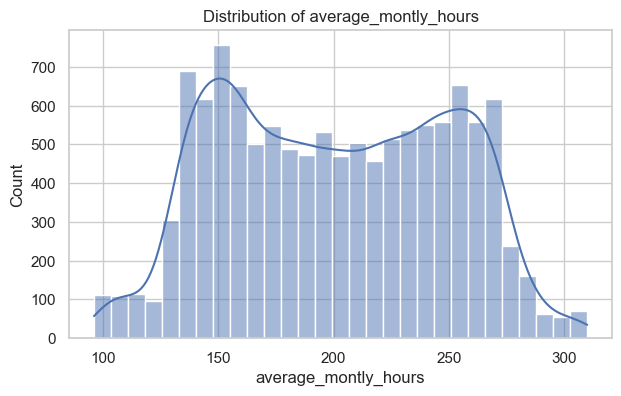

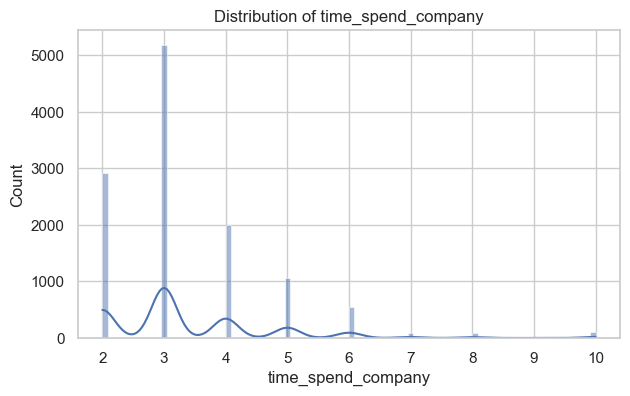

In [17]:
for col in numeric_cols:
    plt.figure(figsize=(7, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


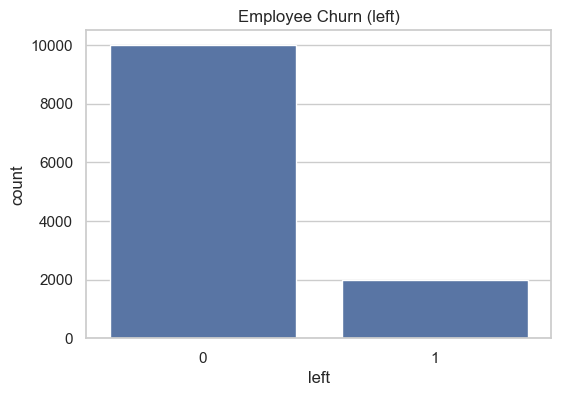

In [18]:
# 6. Countplots for categorical features
plt.figure(figsize=(6, 4))
sns.countplot(x='left', data=df)
plt.title('Employee Churn (left)')
plt.show()

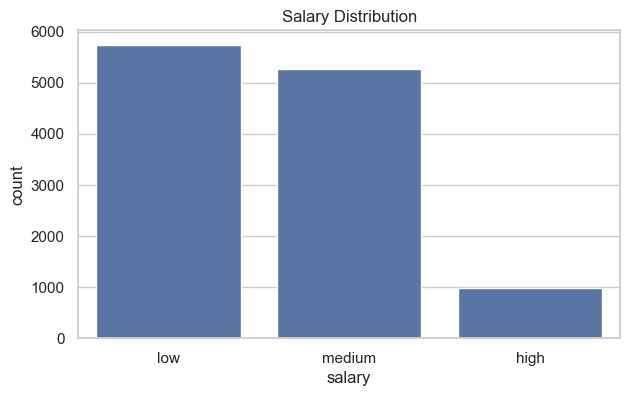

In [19]:
plt.figure(figsize=(7, 4))
sns.countplot(x='salary', data=df, order=['low', 'medium', 'high'])
plt.title('Salary Distribution')
plt.show()

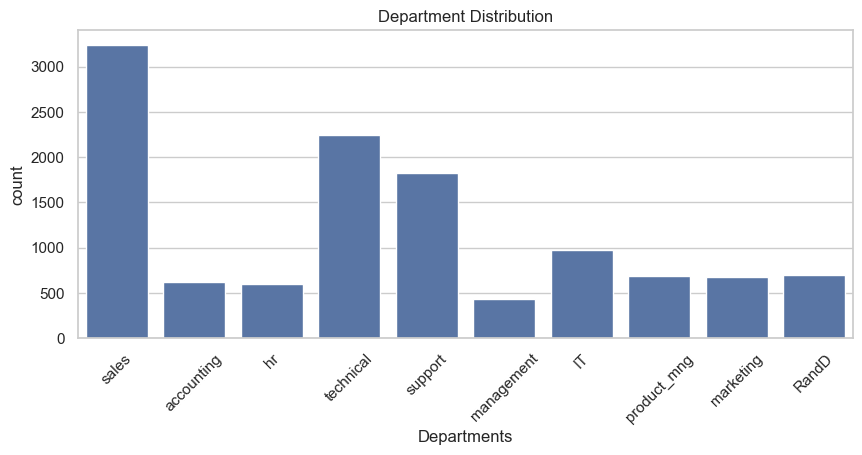

In [20]:
plt.figure(figsize=(10, 4))
sns.countplot(x='Departments', data=df)
plt.title('Department Distribution')
plt.xticks(rotation=45)
plt.show()


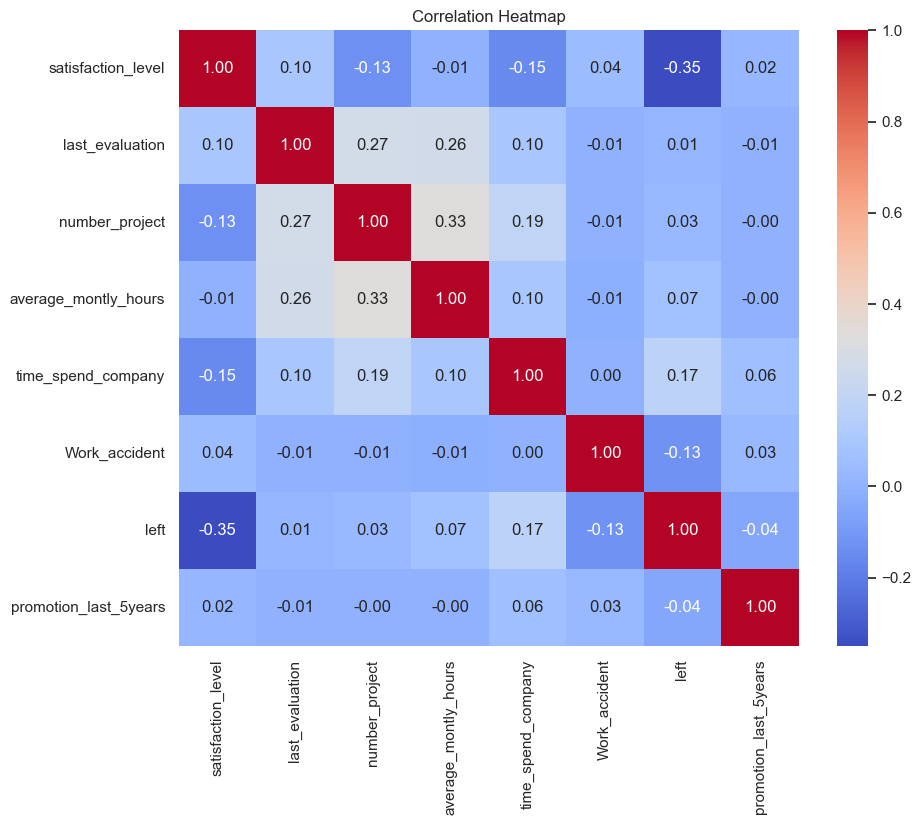

In [21]:
# 7. Correlation Heatmap (numeric features only)
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


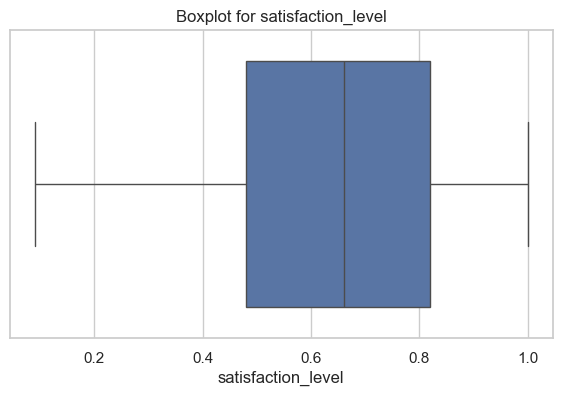

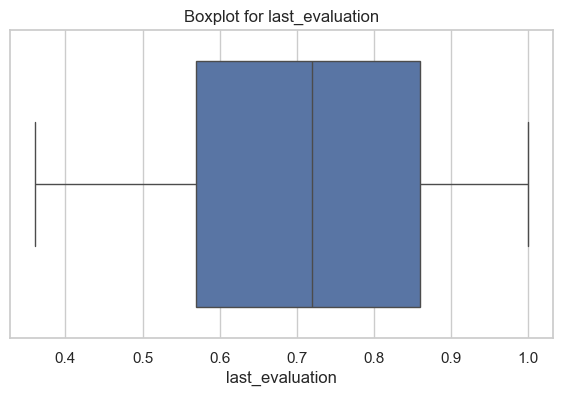

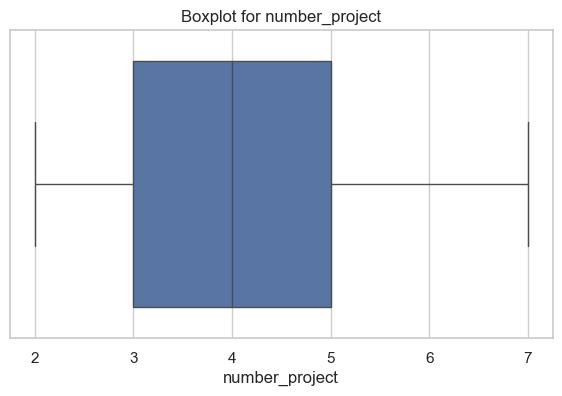

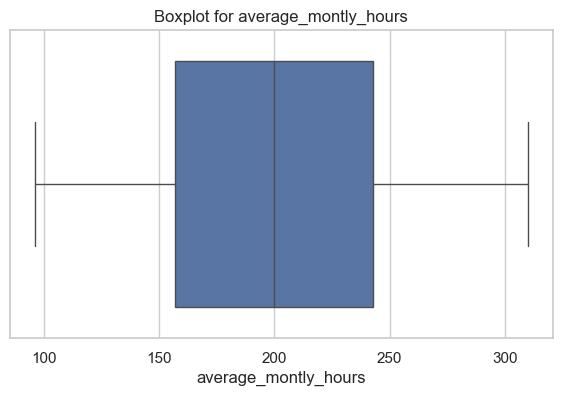

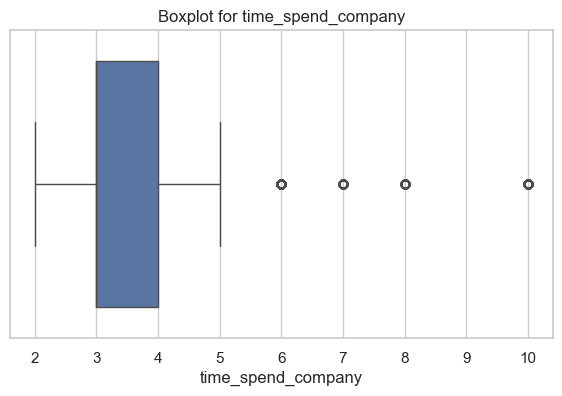

In [22]:
# 8. Outlier Detection with Boxplots
for col in numeric_cols:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

### 1.2 Insights from analysis

##### Dataset Overview after cleaning
- Total Rows (after cleaning): 11,991
- Features: 10 columns, including 2 categorical (salary, Departments) and 8 numerical
- No missing values
- Duplicates removed: 3,008 duplicate rows were detected and dropped

##### Univariate Analysis
- satisfaction_level: Skewed distribution: Many employees have satisfaction levels between 0.6–0.9, but there's a noticeable number with very low satisfaction (< 0.2).
This may indicate that dissatisfaction could be linked to churn.
- left (Target / Churn): ~83% stayed, ~17% left.
Class imbalance is moderate — worth keeping in mind for model evaluation (accuracy might be misleading).
- salary: Most employees have low (48%) or medium (44%) salaries.
Only ~8% have high salaries, which could correlate with retention.
- Departments: Dominated by:
sales (~3,200 employees)
technical (~2,200)
support (~1,800)
Other departments like management, RandD, and product_mng are significantly smaller.

##### Outlier Analysis (Boxplots)
- No extreme or concerning outliers observed — distributions appear within reasonable ranges.
- Features like satisfaction_level, time_spend_company, and number_project are nicely boxed with only mild spread.

### 1.3 Bivariate Plots

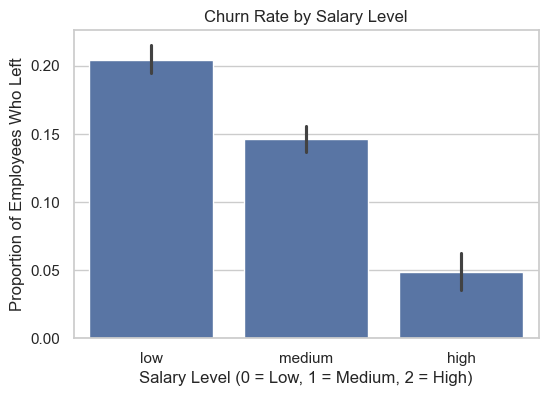

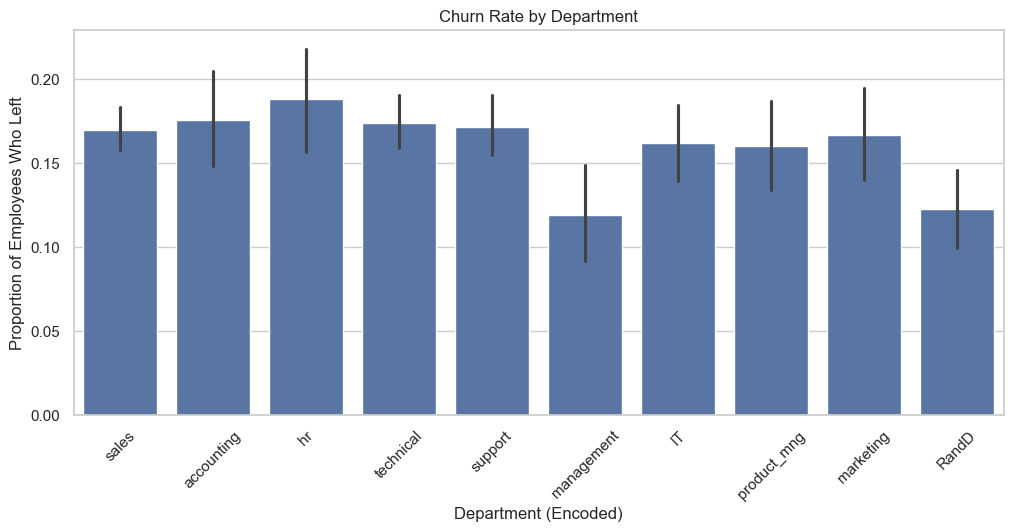

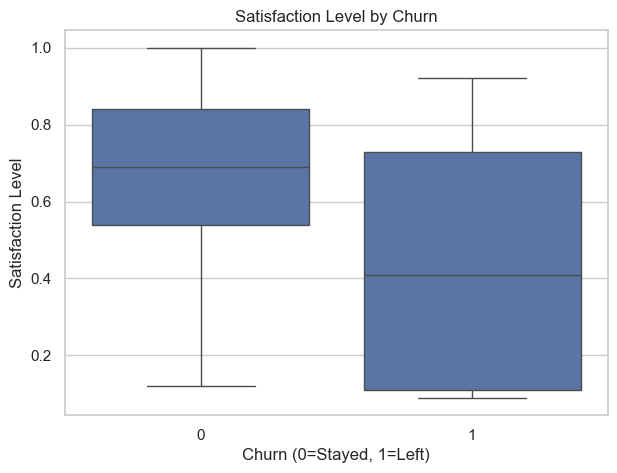

In [23]:
# Churn Rate by Salary
plt.figure(figsize=(6, 4))
sns.barplot(x='salary', y='left', data=df)
plt.title('Churn Rate by Salary Level')
plt.ylabel('Proportion of Employees Who Left')
plt.xlabel('Salary Level (0 = Low, 1 = Medium, 2 = High)')
plt.show()

# Churn Rate by Department
plt.figure(figsize=(12, 5))
sns.barplot(x='Departments', y='left', data=df)
plt.title('Churn Rate by Department')
plt.ylabel('Proportion of Employees Who Left')
plt.xlabel('Department (Encoded)')
plt.xticks(rotation=45)
plt.show()

# Satisfaction vs Churn
plt.figure(figsize=(7, 5))
sns.boxplot(x='left', y='satisfaction_level', data=df)
plt.title('Satisfaction Level by Churn')
plt.xlabel('Churn (0=Stayed, 1=Left)')
plt.ylabel('Satisfaction Level')
plt.show()

- Salary: There's a clear inverse relationship between salary and churn. Better-paid employees are more likely to stay.
- Department: Department affects churn, but not drastically. Certain roles (like HR or accounting) may face higher dissatisfaction or turnover.
- Satisfaction level: Satisfaction level is the strongest predictor of churn.
Dissatisfied employees are very likely to leave, as seen in the correlation matrix (correlation ≈ –0.35).

## 3. Cluster Analysis
- Try to find hidden patterns in data with the help of unsupervised learning algorithms.
- Don't try to use clustering algoritms for classfication.

In [24]:
# 1. Prepare the dataset
df_cluster = df.drop('left', axis=1).copy()

# 2. Ordinal encode 'salary'
salary_map = {'low': 0, 'medium': 1, 'high': 2}
df_cluster['salary'] = df_cluster['salary'].map(salary_map)

# 3. One-hot encode 'Departments' (nominal)
df_cluster = pd.get_dummies(df_cluster, columns=['Departments'], drop_first=True)
df_cluster.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,Departments_RandD,Departments_accounting,Departments_hr,Departments_management,Departments_marketing,Departments_product_mng,Departments_sales,Departments_support,Departments_technical
0,0.38,0.53,2,157,3,0,0,0,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,0,1,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,0,1,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,0,0,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,0,0,False,False,False,False,False,False,True,False,False


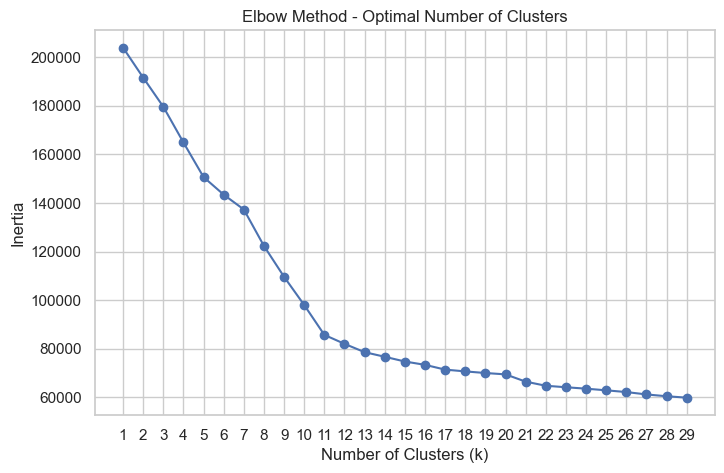

In [25]:
# 4. Scale all features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# 5. Elbow Method to find optimal number of clusters
inertia = []
k_range = range(1, 30)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# 6. Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method - Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

Based on the plot, the optimal number of clusters is likely:
[k = 11]
This is the "elbow point" — the spot just before the inertia stops decreasing significantly.

In [26]:
# 7. Apply KMeans with chosen k=11
kmeans = KMeans(n_clusters=11, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

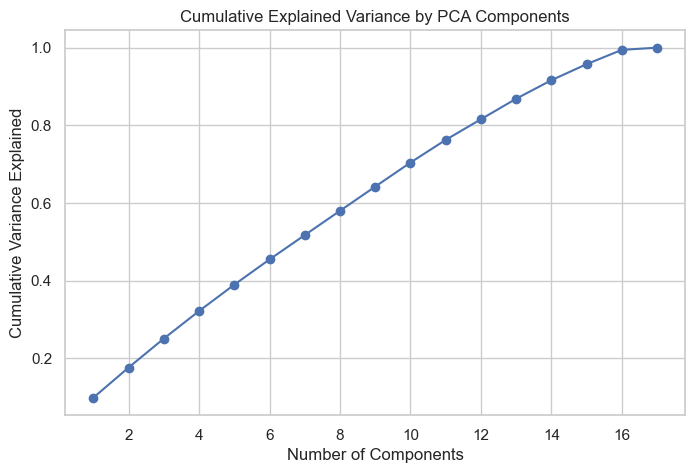

In [27]:
# Perform PCA on scaled data
pca = PCA()
X_pca_full = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# plot curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.show()

##### insights
- The data is high-dimensional — no small number of components captures all the structure.
- we plot the data in 2D and 3D only as a simplified view

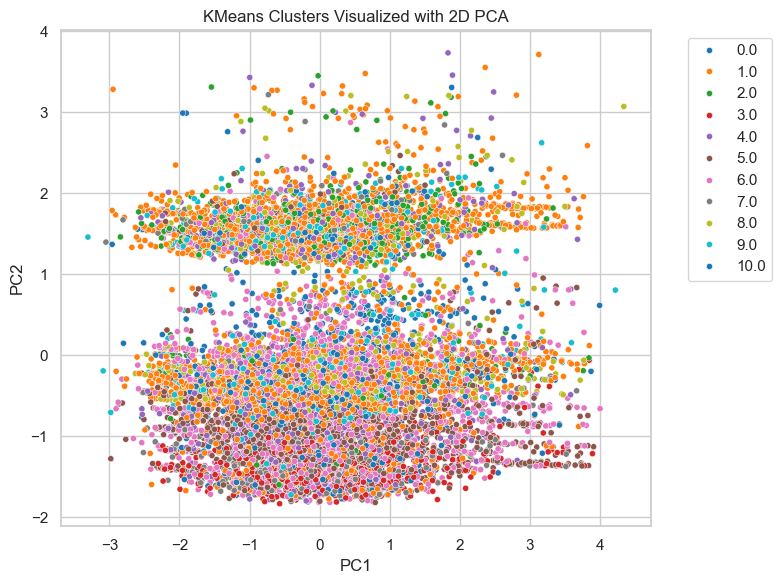

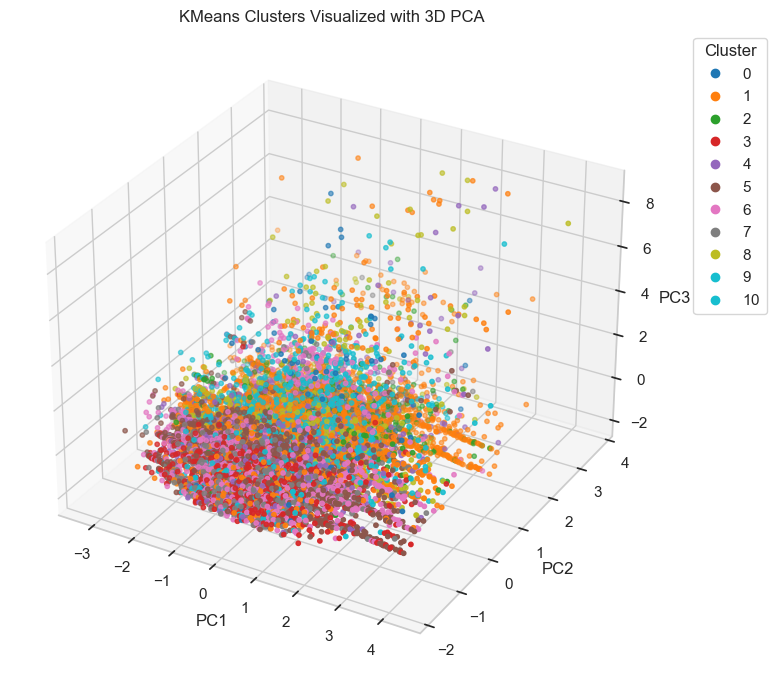

In [28]:
# Slice for 2D and 3D
X_pca_2d = X_pca_full[:, :2]
X_pca_3d = X_pca_full[:, :3]

# Create DataFrames for plotting
pca_df_2d = pd.DataFrame(X_pca_2d, columns=['PC1', 'PC2'])
pca_df_2d['cluster'] = df['cluster']

pca_df_3d = pd.DataFrame(X_pca_3d, columns=['PC1', 'PC2', 'PC3'])
pca_df_3d['cluster'] = df['cluster']

# Plot 2D PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df_2d, x='PC1', y='PC2', hue='cluster', palette='tab10', s=20)
plt.title('KMeans Clusters Visualized with 2D PCA')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot 3D PCA
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    pca_df_3d['PC1'], pca_df_3d['PC2'], pca_df_3d['PC3'],
    c=pca_df_3d['cluster'], cmap='tab10', s=10
)

ax.set_title("KMeans Clusters Visualized with 3D PCA")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

plt.legend(*scatter.legend_elements(), title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


##### Insights from plots
- clusters overlap significantly. This suggests that the true cluster separations exist in higher-dimensional space

##### interpretation of the clusters themselves

In [29]:
cluster_summary = df.groupby('cluster').mean(numeric_only=True)
cluster_summary

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
cluster,,,,,,,,
0,0.666010,0.707438,3.798030,198.630542,3.940887,0.236453,0.039409,1.0
1,0.627064,0.712424,3.786704,200.085714,3.379066,0.000000,0.188685,0.0
2,0.633885,0.719118,3.732198,199.651703,3.407121,0.157895,0.173375,0.0
3,0.621593,0.716966,3.677966,199.018644,3.232203,0.130508,0.191525,0.0
4,0.650241,0.713086,3.764644,199.997908,3.299163,1.000000,0.057531,0.0
5,0.623674,0.718574,3.870626,201.762990,3.323966,0.000000,0.196182,0.0
6,0.634726,0.723368,3.818837,200.581163,3.291413,0.163435,0.172299,0.0
7,0.607349,0.721849,3.824877,201.022913,3.386252,0.140753,0.178396,0.0
8,0.629825,0.713790,3.794461,198.893586,3.341108,0.158892,0.160350,0.0


| Cluster    | Description               | Churn Rate | Notes                                      |
|------------|---------------------------|------------|---------------------------------------------|
| 0          | Engaged & rewarded        | **Low**    | High satisfaction + 100% promotion          |
| 1, 3, 5    | Disengaged or burned out  | **High**   | No promotion + low satisfaction             |
| 4          | Anomaly (accident cases)  | **Low**    | May be a data artifact                      |
| 6–10       | Neutral / stable groups   | Med–Low    | Could be nudged toward improvement          |

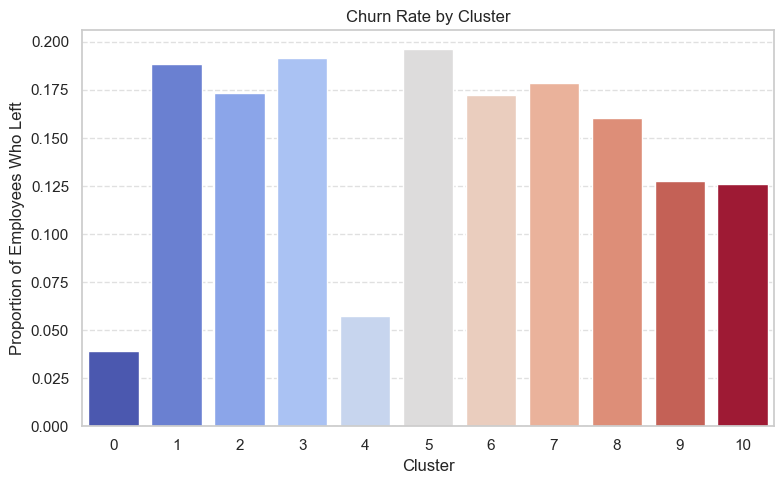

In [30]:
# Recalculate churn rate per cluster
churn_by_cluster = df.groupby('cluster')['left'].mean().reset_index()

plt.figure(figsize=(8, 5))

sns.barplot(
    data=churn_by_cluster,
    x='cluster',
    y='left',
    hue='cluster',              
    palette='coolwarm',
    legend=False               
)

plt.title('Churn Rate by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proportion of Employees Who Left')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## 4. Predictive Model Building

In [31]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary,cluster
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1


### 4.1. Train-Test Validation Checks
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_train_test_validation.html

In [32]:
from deepchecks.tabular import Dataset
from deepchecks.tabular.suites import train_test_validation

# Step 1: Copy original data to preserve df
df_model = df.copy()

# Step 2: Ordinal encode 'salary'
salary_map = {'low': 0, 'medium': 1, 'high': 2}
df_model['salary'] = df_model['salary'].map(salary_map)

# Step 3: One-hot encode 'Departments' (nominal feature)
df_model = pd.get_dummies(df_model, columns=['Departments'], drop_first=True)

# Step 4: Train-test split
from sklearn.model_selection import train_test_split

X = df_model.drop(columns=['left', 'cluster'])  # Exclude target and cluster
y = df_model['left']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 5: Align test set columns with train set (in case dummies differ)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Step 6: Define categorical features (ordinal + binary + one-hot)
cat_features = [
    'salary',                   # Ordinal
    'Work_accident',            # Binary
    'promotion_last_5years'     # Binary
] + [col for col in X_train.columns if col.startswith('Departments_')]

# Step 7: Create Deepchecks Dataset objects
train_ds = Dataset(X_train, label=y_train, cat_features=cat_features)
test_ds = Dataset(X_test, label=y_test, cat_features=cat_features)

# Step 8: Run Deepchecks Train-Test Validation Suite
suite = train_test_validation()
result = suite.run(train_dataset=train_ds, test_dataset=test_ds)

# Step 9: Show result in notebook
result.show()

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_9XZ33IJFA3JOXQGU8XK900ICH">Train Test Validat…

### 4.2. Preprocessing

In [33]:
# Copy the original dataset to avoid modifying it
df_model = df.copy()

In [34]:
df_model.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary,cluster
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1


In [35]:
# Ordinal encode 'salary'
salary_map = {'low': 0, 'medium': 1, 'high': 2}
df_model['salary'] = df_model['salary'].map(salary_map)

# One-hot encode 'Departments'
df_model = pd.get_dummies(df_model, columns=['Departments'], drop_first=True)

# Split features and labels
X = df_model.drop(columns=['left', 'cluster'])
y = df_model['left']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   satisfaction_level       11991 non-null  float64
 1   last_evaluation          11991 non-null  float64
 2   number_project           11991 non-null  int64  
 3   average_montly_hours     11991 non-null  int64  
 4   time_spend_company       11991 non-null  int64  
 5   Work_accident            11991 non-null  int64  
 6   left                     11991 non-null  int64  
 7   promotion_last_5years    11991 non-null  int64  
 8   salary                   11991 non-null  int64  
 9   cluster                  11991 non-null  int32  
 10  Departments_RandD        11991 non-null  bool   
 11  Departments_accounting   11991 non-null  bool   
 12  Departments_hr           11991 non-null  bool   
 13  Departments_management   11991 non-null  bool   
 14  Departments_marketing    11

### 4.3. Classification Algorithms
 - Try at least 4 ML/DL algorithms.

#### 4.3.1. Model Building, Evaluating  and Tuning

In [37]:
results = []

def evaluate_model(name, y_true, y_pred, y_proba=None):
    auc = roc_auc_score(y_true, y_proba) if y_proba is not None else None
    report = classification_report(y_true, y_pred, output_dict=True)
    results.append({
        "Model": name,
        "Accuracy": report["accuracy"],
        "Precision": report["1"]["precision"],
        "Recall": report["1"]["recall"],
        "F1-Score": report["1"]["f1-score"],
        "ROC AUC": auc
    })
    return confusion_matrix(y_true, y_pred)


##### Logistic Regression

In [38]:
# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)
log_pred = log_model.predict(X_test_scaled)
log_proba = log_model.predict_proba(X_test_scaled)[:, 1]
log_cm = evaluate_model("Logistic Regression", y_test, log_pred, log_proba)

In [39]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_proba = rf_model.predict_proba(X_test)[:, 1]
rf_cm = evaluate_model("Random Forest", y_test, rf_pred, rf_proba)

In [40]:
# Support Vector Machine
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)
svm_proba = svm_model.predict_proba(X_test_scaled)[:, 1]
svm_cm = evaluate_model("SVM", y_test, svm_pred, svm_proba)

In [41]:
# Neural Network (Keras)
keras_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
keras_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(patience=5, restore_best_weights=True)
history = keras_model.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)
nn_proba = keras_model.predict(X_test_scaled).flatten()
nn_pred = (nn_proba >= 0.5).astype(int)
nn_cm = evaluate_model("Neural Network (Keras)", y_test, nn_pred, nn_proba)

Epoch 1/50


/Users/bassels/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 719us/step - accuracy: 0.7493 - loss: 0.5123 - val_accuracy: 0.8843 - val_loss: 0.2815
Epoch 2/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - accuracy: 0.8799 - loss: 0.2884 - val_accuracy: 0.9385 - val_loss: 0.1897
Epoch 3/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.9184 - loss: 0.2166 - val_accuracy: 0.9557 - val_loss: 0.1548
Epoch 4/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.9332 - loss: 0.1893 - val_accuracy: 0.9547 - val_loss: 0.1449
Epoch 5/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 0.9369 - loss: 0.1865 - val_accuracy: 0.9557 - val_loss: 0.1472
Epoch 6/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - accuracy: 0.9456 - loss: 0.1684 - val_accuracy: 0.9609 - val_loss: 0.1375
Epoch 7/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - accuracy: 0.9501 - loss: 0.1556 - val_accuracy: 0.9620 - val_loss: 0.1324
Epoch 8/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - accuracy: 0.9557 - loss: 0.1471 - val_accurac

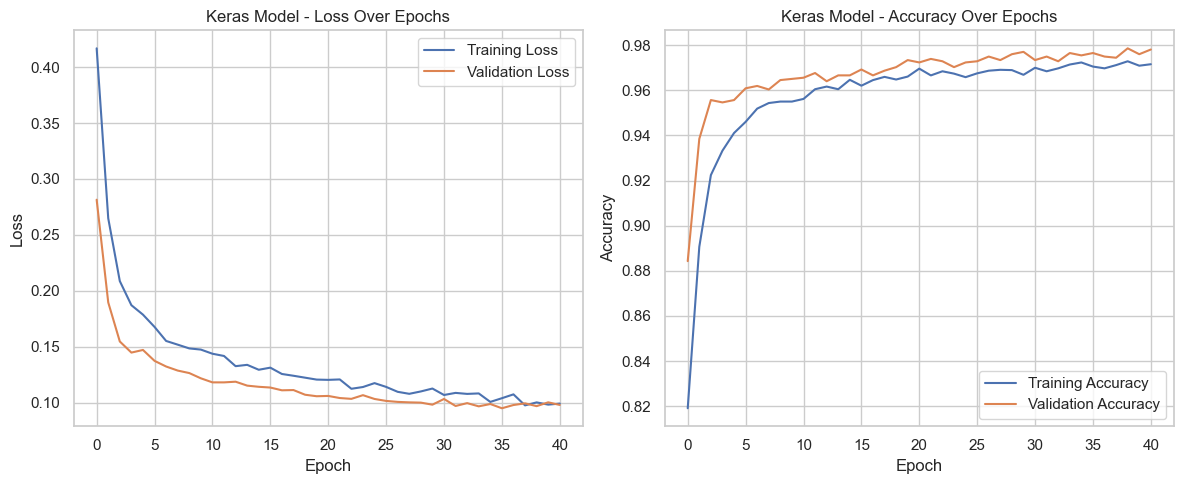

In [42]:
# =========================
# Keras Training Curves
# =========================
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Keras Model - Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Keras Model - Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


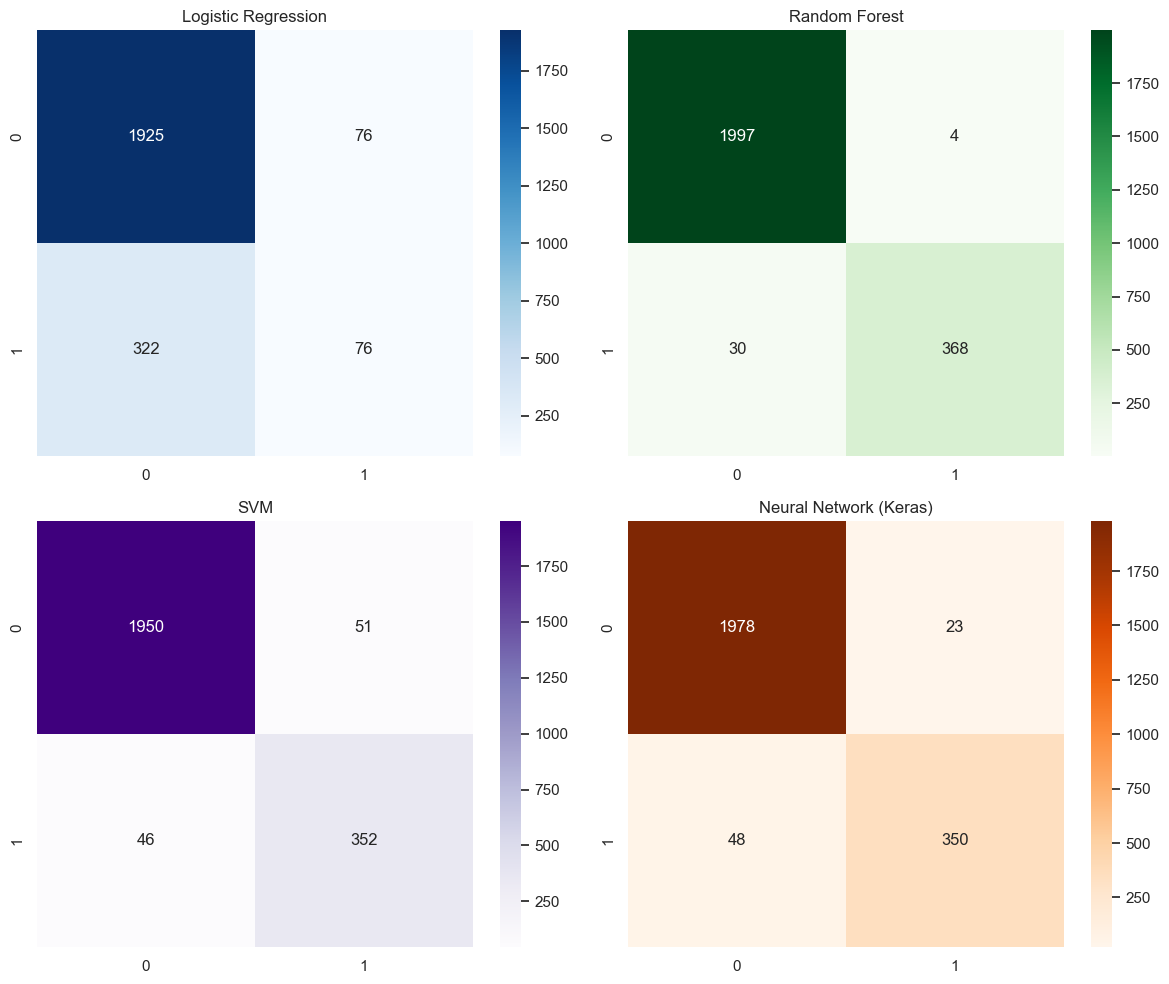

In [43]:
# =========================
# Confusion Matrices
# =========================
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.heatmap(log_cm, annot=True, fmt='d', ax=axes[0, 0], cmap='Blues')
axes[0, 0].set_title("Logistic Regression")
sns.heatmap(rf_cm, annot=True, fmt='d', ax=axes[0, 1], cmap='Greens')
axes[0, 1].set_title("Random Forest")
sns.heatmap(svm_cm, annot=True, fmt='d', ax=axes[1, 0], cmap='Purples')
axes[1, 0].set_title("SVM")
sns.heatmap(nn_cm, annot=True, fmt='d', ax=axes[1, 1], cmap='Oranges')
axes[1, 1].set_title("Neural Network (Keras)")
plt.tight_layout()
plt.show()


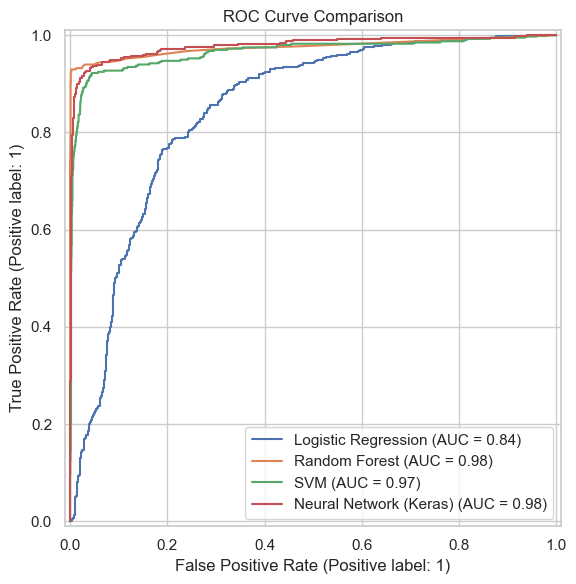

In [44]:
# =========================
# ROC Curve Comparison
# =========================
plt.figure(figsize=(10, 6))
RocCurveDisplay.from_predictions(y_test, log_proba, name="Logistic Regression", ax=plt.gca())
RocCurveDisplay.from_predictions(y_test, rf_proba, name="Random Forest", ax=plt.gca())
RocCurveDisplay.from_predictions(y_test, svm_proba, name="SVM", ax=plt.gca())
RocCurveDisplay.from_predictions(y_test, nn_proba, name="Neural Network (Keras)", ax=plt.gca())
plt.title("ROC Curve Comparison")
plt.grid(True)
plt.tight_layout()
plt.show()

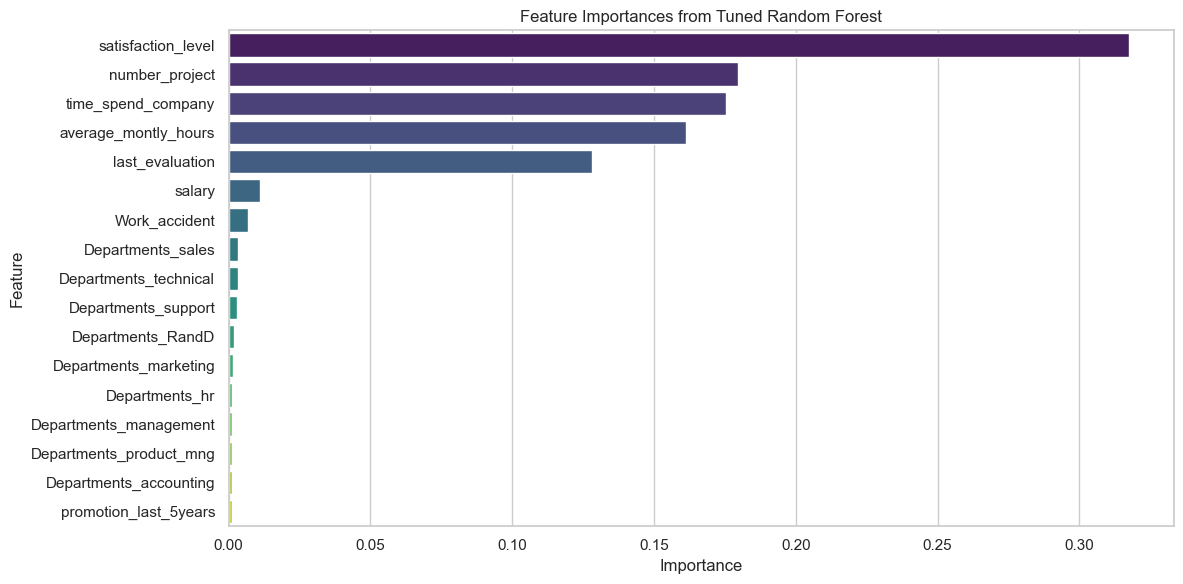

In [89]:
# from forest tree model we can plot feature importance
feature_names = X_train.columns

# Get feature importances from the trained Random Forest model
importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importances from Tuned Random Forest')
plt.tight_layout()
plt.show()

In [45]:
# =========================
# Results Comparison Table
# =========================
results_df = pd.DataFrame(results)
display(results_df.sort_values(by="ROC AUC", ascending=False))

,Model,Accuracy,Precision,Recall,F1-Score,ROC AUC
3,Neural Network (Keras),0.970404,0.938338,0.879397,0.907912,0.978572
1,Random Forest,0.985827,0.989247,0.924623,0.955844,0.975657
2,SVM,0.959566,0.873449,0.884422,0.878901,0.965811
0,Logistic Regression,0.834098,0.500000,0.190955,0.276364,0.844034


### ***Detailed Analysis***
##### 1. Best Overall Models
Neural Network (Keras) and Random Forest clearly outperform the others across all metrics.
Both achieve near-perfect ROC AUC (~0.98), excellent precision, and high recall — great for sensitive classification like churn.
Confusion matrices confirm their balanced prediction across classes, with low false positives and false negatives.
##### 2. Logistic Regression = Weakest Model
Low Recall (19%) → it misses most of the churners.
Precision = 50%, so it guesses poorly on the positive class.
Still has some predictive power (AUC = 0.84), but not competitive.
Use it as a baseline, but it’s not suitable for deployment in this case.

##### 3. SVM is Strong, but Slightly Behind
Good balance of precision and recall
Slightly lower ROC AUC and F1 than NN/RF
Confusion matrix shows it's slightly more biased than RF or NN
May require hyperparameter tuning to catch up.

##### 4. Neural Network Training Looks Healthy
Loss & accuracy curves are smooth and stable
No overfitting: training and validation curves are close together
You could even run a few more epochs if needed, but 45 was enough!

### 4.3.2 Parameter Tuning of the models:
- we will eliminate the linear regression as it performs purly
- we will now tune and retrain the models (NN, random forest, SVM) to get the best performers.

In [ ]:
# ---------------------------
# 1. Random Forest Tuning
# ---------------------------
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=rf_params,
    scoring='recall',  # focus on catching actual churners
    cv=5,
    n_jobs=-1,
    verbose=1
)

rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
print("🔍 Best Random Forest (by Recall):", rf_grid.best_params_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
🔍 Best Random Forest (by Recall): {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
# ---------------------------
# 2. SVM Tuning
# ---------------------------
svm_params = {
    'C': [1, 10],
    'gamma': ['scale', 0.01],
    'kernel': ['rbf']
}

svm_grid = GridSearchCV(
    estimator=SVC(probability=True),
    param_grid=svm_params,
    scoring='recall',  # focus on catching churners
    cv=5,
    n_jobs=-1,
    verbose=1
)

svm_grid.fit(X_train_scaled, y_train)
best_svm = svm_grid.best_estimator_
print("🔍 Best SVM (by Recall):", svm_grid.best_params_)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
🔍 Best SVM (by Recall): {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [48]:
# ---------------------------
# 3. NN
# ---------------------------
# Define the model builder function
def build_model(hp):
    model = Sequential()

    # First hidden layer
    model.add(Dense(
        units=hp.Int('units_1', min_value=32, max_value=256, step=32),
        activation='relu',
        input_shape=(X_train_scaled.shape[1],)
    ))

    # Optional second layer
    if hp.Boolean('add_layer_2'):
        model.add(Dense(
            units=hp.Int('units_2', min_value=32, max_value=128, step=32),
            activation='relu'
        ))

    # Dropout layer
    model.add(Dropout(rate=hp.Float('dropout', 0.1, 0.5, step=0.1)))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy', Recall(name="recall")]
    )

    return model

# Initialize Bayesian tuner
tuner = kt.BayesianOptimization(
    build_model,
    objective=kt.Objective("val_recall", direction="max"),
    max_trials=15,
    directory='keras_tuner_dir',
    project_name='churn_nn_recall'
)

# Run the search
tuner.search(
    X_train_scaled, y_train,
    epochs=50,
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)],
    verbose=1
)

# Retrieve the best model
best_nn = tuner.get_best_models(num_models=1)[0]
best_nn.summary()

Trial 15 Complete [00h 00m 04s]
val_recall: 0.9304635524749756

Best val_recall So Far: 0.9304635524749756
Total elapsed time: 00h 01m 14s


/Users/bassels/Library/Python/3.9/lib/python/site-packages/keras/src/saving/saving_lib.py:757: UserWarning:

Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,465 (25.25 KB)

 Trainable params: 6,465 (25.25 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
tuner.results_summary()

Results summary
Results in keras_tuner_dir/churn_nn_recall
Showing 10 best trials
Objective(name="val_recall", direction="max")

Trial 12 summary
Hyperparameters:
units_1: 128
add_layer_2: True
dropout: 0.2
learning_rate: 0.001
units_2: 32
Score: 0.9304635524749756

Trial 14 summary
Hyperparameters:
units_1: 160
add_layer_2: False
dropout: 0.4
learning_rate: 0.01
units_2: 128
Score: 0.9304635524749756

Trial 01 summary
Hyperparameters:
units_1: 160
add_layer_2: True
dropout: 0.1
learning_rate: 0.001
units_2: 64
Score: 0.9271523356437683

Trial 06 summary
Hyperparameters:
units_1: 192
add_layer_2: True
dropout: 0.1
learning_rate: 0.001
units_2: 32
Score: 0.9271523356437683

Trial 07 summary
Hyperparameters:
units_1: 224
add_layer_2: False
dropout: 0.30000000000000004
learning_rate: 0.001
units_2: 64
Score: 0.9271523356437683

Trial 08 summary
Hyperparameters:
units_1: 256
add_layer_2: False
dropout: 0.2
learning_rate: 0.001
units_2: 32
Score: 0.9271523356437683

Trial 11 summary
Hyperpa

##### 4.3.3 Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [56]:
X_train.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,Departments_RandD,Departments_accounting,Departments_hr,Departments_management,Departments_marketing,Departments_product_mng,Departments_sales,Departments_support,Departments_technical
2041,0.98,0.91,4,240,3,0,0,0,False,False,False,False,False,False,False,False,True
10444,0.63,0.89,3,239,3,0,0,1,False,False,False,False,False,False,False,False,False
2030,0.85,0.59,3,235,3,0,0,0,False,False,False,False,False,False,False,True,False
11606,0.56,0.39,3,106,8,0,0,2,False,False,False,True,False,False,False,False,False
2008,0.50,0.75,6,127,3,0,0,0,False,False,False,False,False,False,True,False,False


In [60]:
from deepchecks.tabular import Dataset
from deepchecks.tabular.suites import model_evaluation

# salary was encoded using ordinal encoding → should remain in cat_features
# Even though it's numeric, it represents ordered categories — not a true continuous value
cat_features = ['salary']

# Create Deepchecks Dataset objects (target passed separately via 'label')
train_ds = Dataset(X_train, label=y_train, cat_features=cat_features)
test_ds = Dataset(X_test, label=y_test, cat_features=cat_features)

# Run Model Evaluation Suite
suite = model_evaluation()
suite.run(train_ds, test_ds, model=best_rf).show()


Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_4LMV6WM3UBFTOKMEF7E6RV4BX">Model Evaluation S…

#### 4.3.4. Compare Models Performances
- Compare model performances according to metrics you choose for the problem.

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step


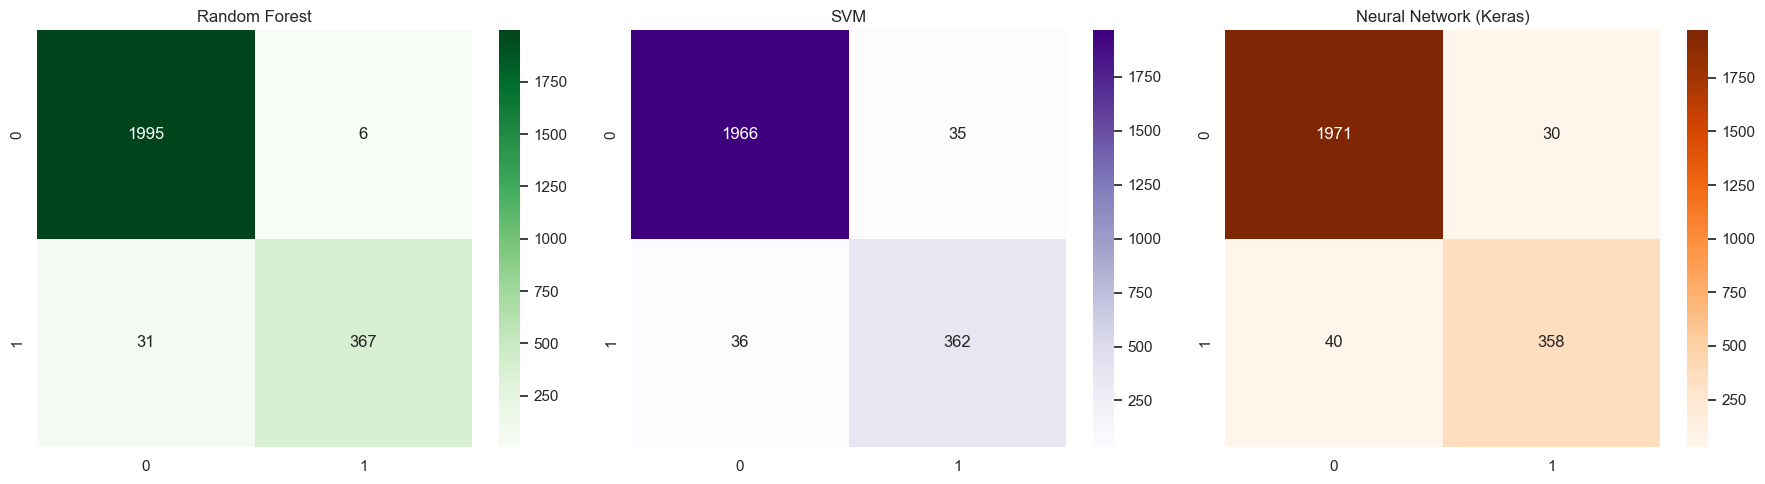

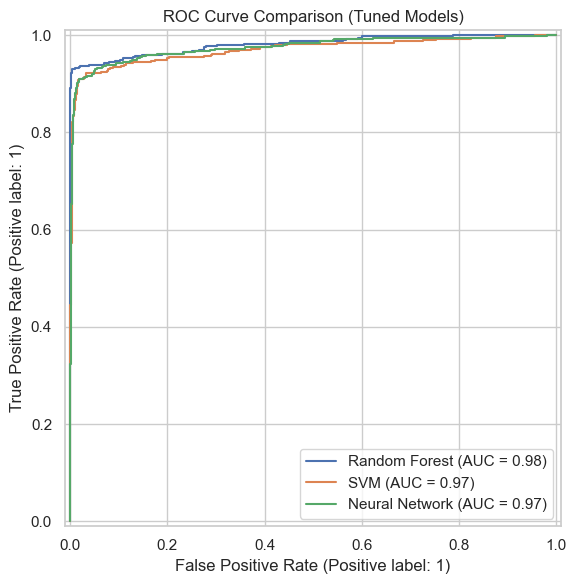

,Model,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,Tuned Random Forest,0.984577,0.983914,0.922111,0.952010,0.981372
2,Tuned Neural Network,0.970821,0.922680,0.899497,0.910941,0.974845
1,Tuned SVM,0.970404,0.911839,0.909548,0.910692,0.970162


In [51]:
# Store results
tuned_results = []

# Common evaluation function
def evaluate_model(name, model, X_test, y_test, is_keras=False):
    if is_keras:
        y_proba = model.predict(X_test).flatten()
        y_pred = (y_proba >= 0.5).astype(int)
    else:
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]
    
    auc = roc_auc_score(y_test, y_proba)
    report = classification_report(y_test, y_pred, output_dict=True)

    tuned_results.append({
        "Model": name,
        "Accuracy": report["accuracy"],
        "Precision": report["1"]["precision"],
        "Recall": report["1"]["recall"],
        "F1-Score": report["1"]["f1-score"],
        "ROC AUC": auc
    })

    cm = confusion_matrix(y_test, y_pred)
    return cm, y_proba

# Evaluate tuned models
rf_cm, rf_proba = evaluate_model("Tuned Random Forest", best_rf, X_test, y_test)
svm_cm, svm_proba = evaluate_model("Tuned SVM", best_svm, X_test_scaled, y_test)
nn_cm, nn_proba = evaluate_model("Tuned Neural Network", best_nn, X_test_scaled, y_test, is_keras=True)

# ============================
# Plot Confusion Matrices
# ============================
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens', ax=axes[0])
axes[0].set_title("Random Forest")

sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Purples', ax=axes[1])
axes[1].set_title("SVM")

sns.heatmap(nn_cm, annot=True, fmt='d', cmap='Oranges', ax=axes[2])
axes[2].set_title("Neural Network (Keras)")

plt.tight_layout()
plt.show()

# ============================
# Plot ROC Curve Comparison
# ============================
plt.figure(figsize=(10, 6))
RocCurveDisplay.from_predictions(y_test, rf_proba, name="Random Forest", ax=plt.gca())
RocCurveDisplay.from_predictions(y_test, svm_proba, name="SVM", ax=plt.gca())
RocCurveDisplay.from_predictions(y_test, nn_proba, name="Neural Network", ax=plt.gca())
plt.title("ROC Curve Comparison (Tuned Models)")
plt.grid(True)
plt.tight_layout()
plt.show()

# ============================
# Show Final Results Table
# ============================
tuned_results_df = pd.DataFrame(tuned_results)
display(tuned_results_df.sort_values(by="ROC AUC", ascending=False))


Conclusions:
- Random Forest: Best Overall Model
Top scores in recall, F1, accuracy, and AUC.
More interpretable and faster to train than neural networks.
Easier to deploy and maintain.
- Neural Network (Keras):
Still excellent performance.
Slightly more complex, and recall didn’t surpass Random Forest despite optimization.
Might benefit from more data or further tuning (deeper architecture, more epochs).
- SVM:
Strong contender with robust performance.
Good recall and AUC, but slightly lower precision and F1.


Best Model: Random Forest

####  4.3.5 Prediction
- Make a demo prediction 

In [63]:
# Choose a random sample from X_test for demo prediction
sample_rf = X_test[:1]
sample_nn = X_test_scaled[:1]

# Random Forest Prediction
rf_pred = best_rf.predict(sample_rf)
print("Random Forest Prediction:", rf_pred)

# Neural Network Prediction
nn_pred = (best_nn.predict(sample_nn) > 0.5).astype("int32")
print("Neural Network Prediction:", nn_pred)

Random Forest Prediction: [0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Neural Network Prediction: [[0]]


## 5. Model Deployement
- Finalize your model with whole dataset and prepare for the deployment.

### 5.1. Final Model

In [64]:
best_rf

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

### 5.2. Save and Export the Best Model

In [87]:
import joblib

# Save Random Forest model
joblib.dump(best_rf, 'final_random_forest_model.pkl')

['final_random_forest_model.pkl']

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___